'Signal and Systems Project '

'Hossein Razavi ' 

'Supervisor :Dr musavi '

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

'Defining The functions '

In [2]:

def f1(t):
    return np.cos(t)

def f2(t):
    return np.exp(-t) * (t >= 0)

def f3(t):
    return t >= 0


'Ploting the impulse-response' 

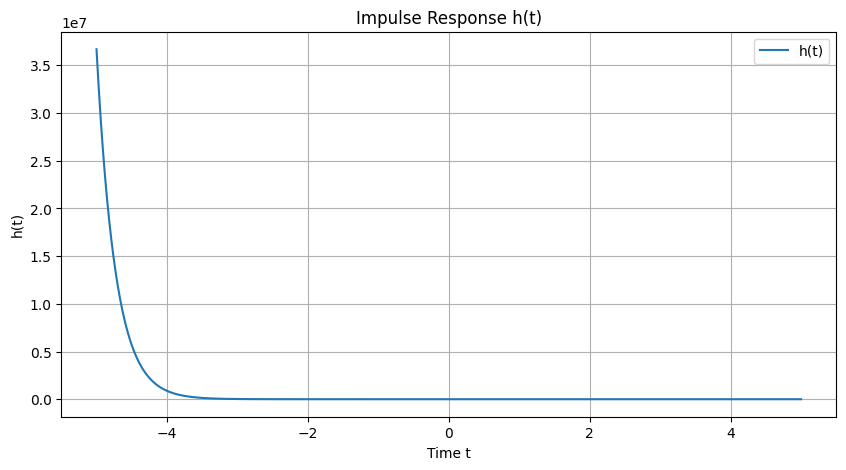

In [3]:
a = 1 / (2 * np.sqrt(3))
b = -2 - np.sqrt(3)
c = -2 + np.sqrt(3)
 
def h(t) :
    return a * (np.exp(b*t) - np.exp(c*t))

t = np.linspace(-5, 5, 1000) 

# Compute the impulse response
impulse_response = h(t)

# Plot the impulse response
plt.figure(figsize=(10, 5))
plt.plot(t, impulse_response, label='h(t)')
plt.title('Impulse Response h(t)')
plt.xlabel('Time t')
plt.ylabel('h(t)')
plt.grid(True)
plt.legend()
plt.show()


'Writing the convolution algorithm and use it to compute the output'

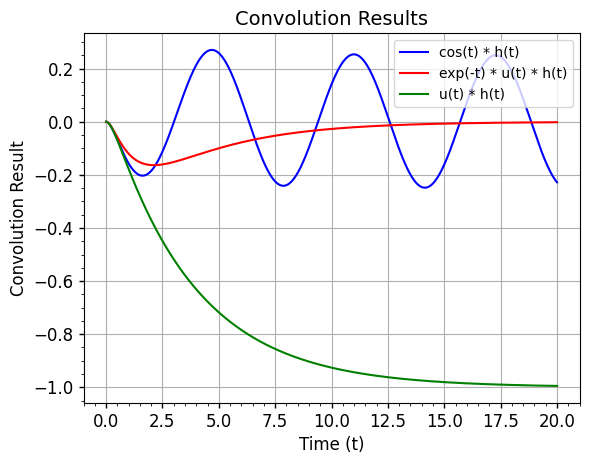

In [4]:
def my_continuous_convolution(f, g, t):
  
    y = np.zeros_like(t)
 

    for i in range(len(t)):
        tau = t[:i+1]
        f_tau = f(tau)
        g_t_tau = g(t[i] - tau)
        y[i] = np.trapz(f_tau * g_t_tau, tau) #using the trapz to compute the integral numericaly 

    return y

# Define the time vector from 0 to 10 seconds with a step size of 0.01 seconds
t = np.arange(0, 10.01, 0.01)

# Define the time vector for convolution
t_conv = np.linspace(0, 20, len(t)*2-1) 

# Compute convolutions
conv_result1 = my_continuous_convolution(f1, h, t_conv) # cos(t) * h(t)
conv_result2 = my_continuous_convolution(f2, h, t_conv) # exp(-t) * u(t) * h(t)
conv_result3 = my_continuous_convolution(f3, h, t_conv) # u(t) * h(t)

# Plot convolutions
plt.figure()
plt.plot(t_conv, conv_result1, 'b-', t_conv, conv_result2, 'r-', t_conv, conv_result3, 'g-', linewidth=1.5)
plt.xlabel('Time (t)', fontsize=12)
plt.ylabel('Convolution Result', fontsize=12) 
plt.title('Convolution Results', fontsize=14)
plt.legend(['cos(t) * h(t)', 'exp(-t) * u(t) * h(t)', 'u(t) * h(t)'], loc='upper right')
plt.grid(True)
plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=12, width=1)
plt.box(True)
plt.show()

'computing the fourier series coefficients ' 

In [5]:
def fourier_series_coefficients(signal, T, N):
    a = np.zeros(N, dtype=complex)
    t = np.linspace(0, T, 1000, endpoint=False)
    
    for k in range(N):
        a[k] = np.trapz(signal(t) * np.exp(-1j * 2 * np.pi * k * t / T), t) / T
    
    return a


In [6]:
def frequency_response(w):
    H = 1 / (-w**2 + 4j * w + 1)
    return H

'Recosnstructing the signals using fourier series ' 

In [7]:
# Compute the output signal's Fourier series coefficients
def output_fourier_series(a, T, N):
    b = np.zeros(N, dtype=complex)
    for k in range(N):
        w = 2 * np.pi * k / T
        b[k] = a[k] * frequency_response(w)
    return b

# Reconstruct the time-domain signal from Fourier series coefficients
def reconstruct_signal(b, T, t):
    N = len(b)
    signal = np.zeros_like(t, dtype=complex)
    
    for k in range(N):
        signal += b[k] * np.exp(1j * 2 * np.pi * k * t / T)
    
    return np.real(signal)


'Computing the outputs using fourier series ' 

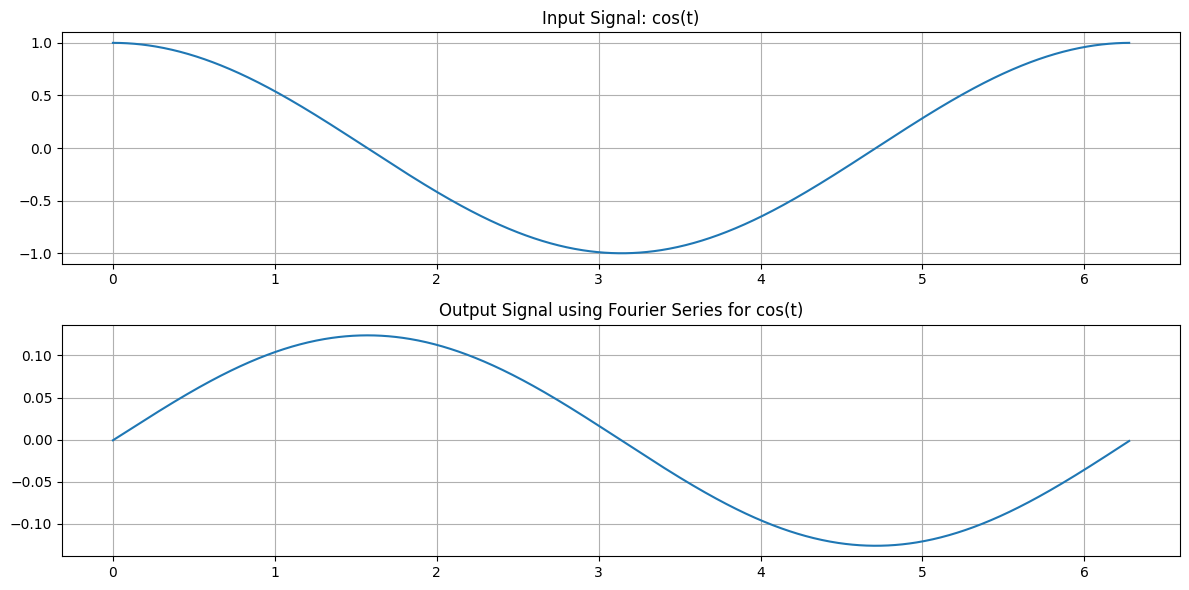

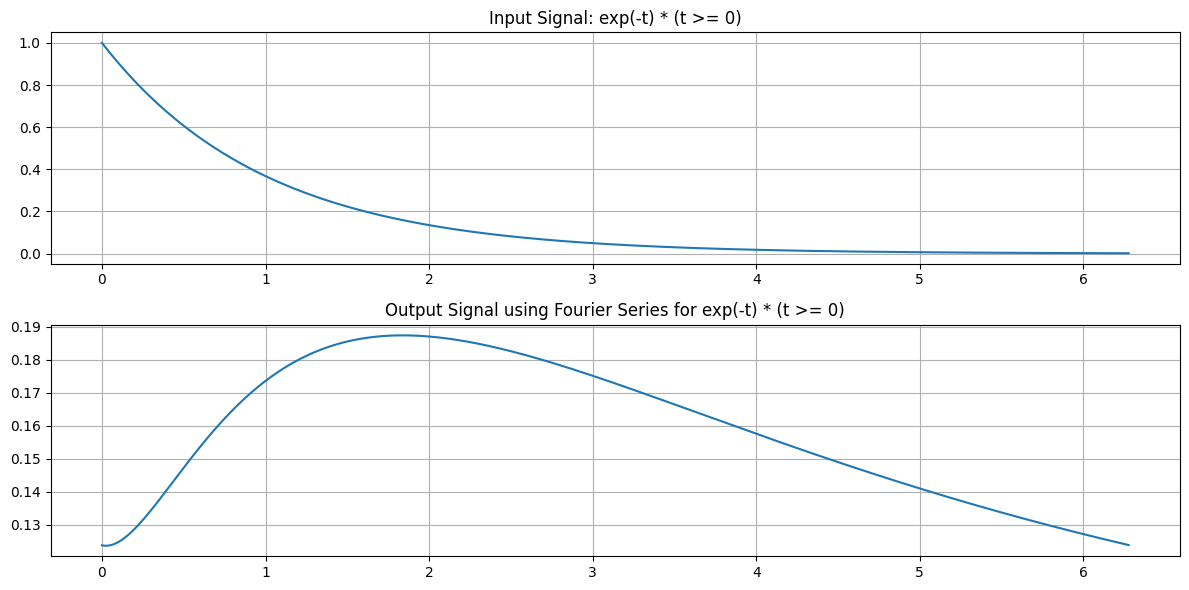

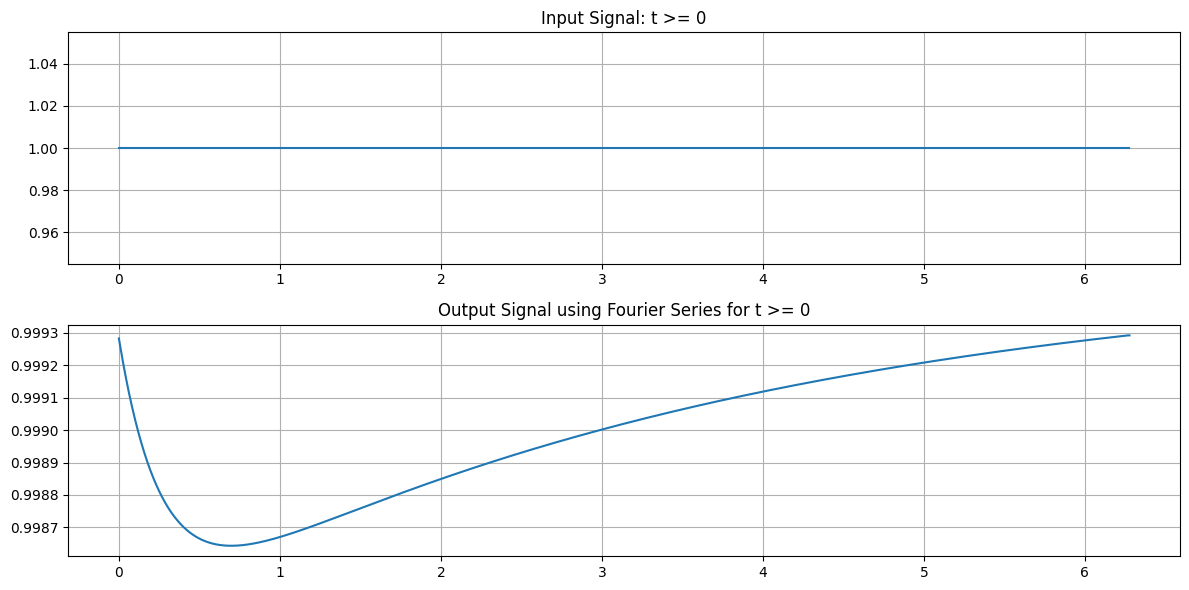

In [8]:
T = 2 * np.pi  # Period of the input signal for all signals
N = 1000        # Number of harmonics

signals = [f1, f2, f3]
signal_names = ["cos(t)", "exp(-t) * (t >= 0)", "t >= 0"]

# Plot the input and output signals for each input
for i, signal in enumerate(signals):
    t = np.linspace(0, T, 1000, endpoint=False)
    a = fourier_series_coefficients(signal, T, N)
    b = output_fourier_series(a, T, N)
    output_signal = reconstruct_signal(b, T, t)

    # Plot the input and output signals
    plt.figure(figsize=(12, 6))
    
    plt.subplot(2, 1, 1)
    plt.plot(t, signal(t))
    plt.title(f'Input Signal: {signal_names[i]}')
    plt.grid(True)
    
    plt.subplot(2, 1, 2)
    plt.plot(t, output_signal)
    plt.title(f'Output Signal using Fourier Series for {signal_names[i]}')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

'using the "Fast-Fourier-Transform" (fft) to compute the outputs '

In [9]:
# Compute the FFT of the signal
def compute_fft(signal, T):
    N = len(signal)
    f_signal = np.fft.fft(signal)
    freqs = np.fft.fftfreq(N, T / N)
    return f_signal, freqs

# Compute the IFFT to get the time-domain signal
def compute_ifft(f_signal):
    signal = np.fft.ifft(f_signal)
    return np.real(signal)


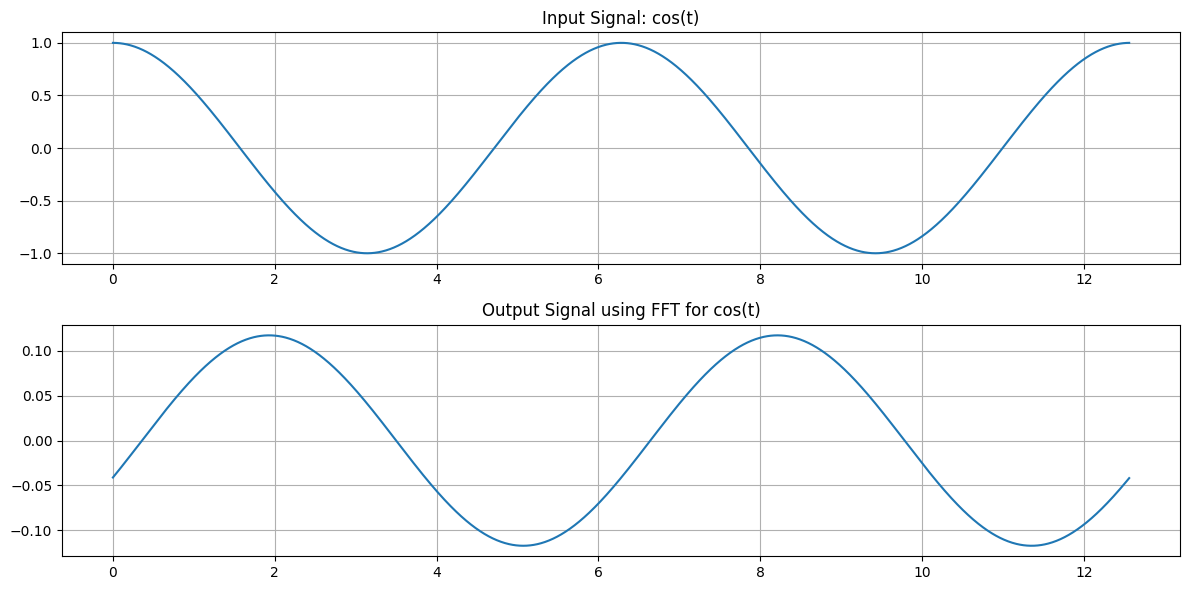

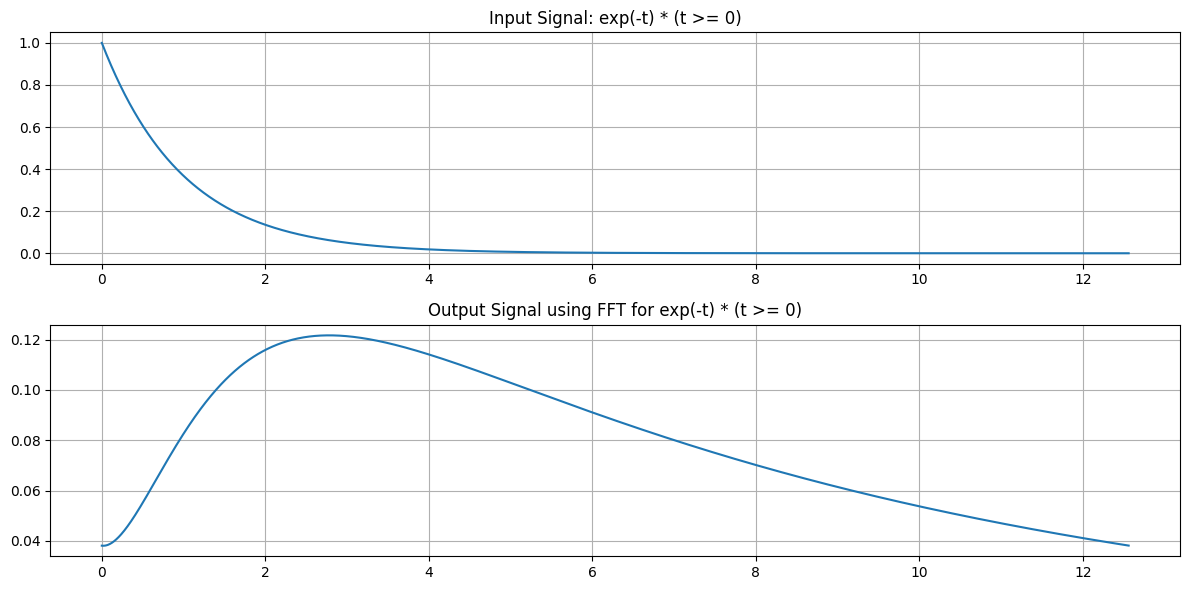

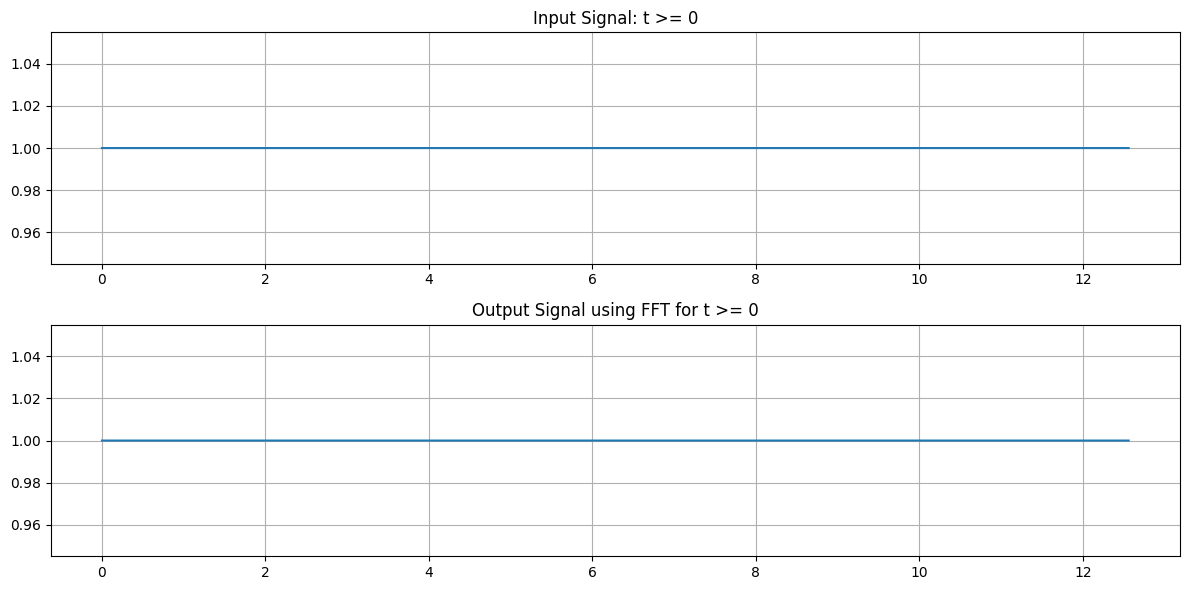

In [10]:
for i, signal_func in enumerate(signals):
    t= np.linspace(0, 2 * T, 2 * N, endpoint=False)
    input_signal = signal_func(t)
    
    # Compute FFT of the input signal
    f_signal, freqs = compute_fft(input_signal, T)
    
    # Compute the system's frequency response at the frequencies of the FFT
    w = 2 * np.pi * freqs
    H_w = frequency_response(w)
    
    # Compute the FFT of the output signal
    f_output_signal = f_signal * H_w
    
    # Compute the inverse FFT to get the output signal in the time domain
    output_signal = compute_ifft(f_output_signal)
    
    # Plot the input and output signals
    plt.figure(figsize=(12, 6))
    
    plt.subplot(2, 1, 1)
    plt.plot(t, input_signal)
    plt.title(f'Input Signal: {signal_names[i]}')
    plt.grid(True)
    
    plt.subplot(2, 1, 2)
    plt.plot(t, output_signal)
    plt.title(f'Output Signal using FFT for {signal_names[i]}')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()